### Hemlata Channe
#### NLP Project I Part I
#### DOMAIN: Digital content management
    • CONTEXT: Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles,etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classi ier that predicts multiple features of the author of a given text. We have designed it as a Multi label classi ication problem.
    • DATA DESCRIPTION: Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate ile, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
    • 8240 "10s" blogs (ages 13-17),
    • 8086 "20s" blogs(ages 23-27) and
    • 2994 "30s" blogs (ages 33-47)
    For each age group, there is an equal number of male and female bloggers.
    Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link. Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus
    • PROJECT OBJECTIVE: The need is to build a NLP classi ier which can use input text parameters to determine the label/s of the blog.
    Steps and tasks:
    1. Import and analyse the data set.
    2. Perform data pre-processing on the data:
    • Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase.
    • Target/label merger and transformation
    • Train and test split
    • Vectorisation, etc.
    3. Design, train, tune and test the best text classi ier.
    4. Display and explain detail the classi ication report
    5.Print the true vs predicted labels for any 5 entries from the dataset.
    Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN classifiers. Be analytical and experimental here in trying new approaches to design the best model

In [201]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

## Task 1: Import and analyse the data set.

In [202]:
Data = pd.read_csv("blogtext.csv",nrows = 10000)
Data.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [203]:
Data.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [204]:
Data.dtypes

id         int64
gender    object
age        int64
topic     object
sign      object
date      object
text      object
dtype: object

In [205]:
Data.head(2)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...


In [206]:
Data.shape

(10000, 7)

In [207]:
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10000.0,1.854823e+06,1.303245e+06,467705.0,649790.0,1103575.0,3176655.0,4321554.0
age,10000.0,2.801930e+01,8.123923e+00,13.0,23.0,27.0,35.0,46.0


In [208]:
Data.dtypes

id         int64
gender    object
age        int64
topic     object
sign      object
date      object
text      object
dtype: object

<AxesSubplot:xlabel='gender', ylabel='count'>

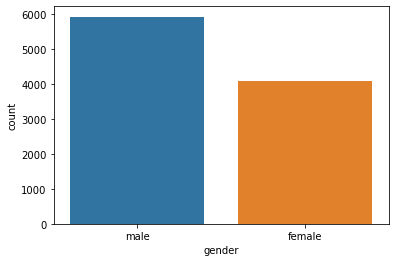

In [209]:
sns.countplot(Data['gender'])

#### There are almost equal number of male and female.

<AxesSubplot:xlabel='age', ylabel='count'>

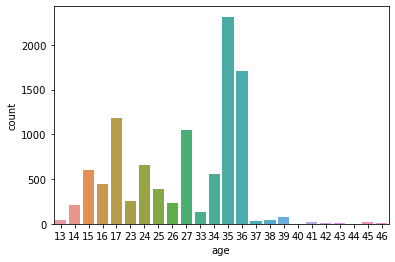

In [210]:
sns.countplot(Data['age'])

##### There are more number of people in the age group 16 to 27.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Student'),
  Text(1, 0, 'InvestmentBanking'),
  Text(2, 0, 'indUnk'),
  Text(3, 0, 'Non-Profit'),
  Text(4, 0, 'Banking'),
  Text(5, 0, 'Education'),
  Text(6, 0, 'Engineering'),
  Text(7, 0, 'Science'),
  Text(8, 0, 'Communications-Media'),
  Text(9, 0, 'BusinessServices'),
  Text(10, 0, 'Sports-Recreation'),
  Text(11, 0, 'Arts'),
  Text(12, 0, 'Internet'),
  Text(13, 0, 'Museums-Libraries'),
  Text(14, 0, 'Accounting'),
  Text(15, 0, 'Technology'),
  Text(16, 0, 'Law'),
  Text(17, 0, 'Consulting'),
  Text(18, 0, 'Automotive'),
  Text(19, 0, 'Religion'),
  Text(20, 0, 'Fashion'),
  Text(21, 0, 'Publishing'),
  Text(22, 0, 'Marketing'),
  Text(23, 0, 'LawEnforcement-Security'),
  Text(24, 0, 'HumanResources'),
  Text(25, 0, 'Telecommunications')])

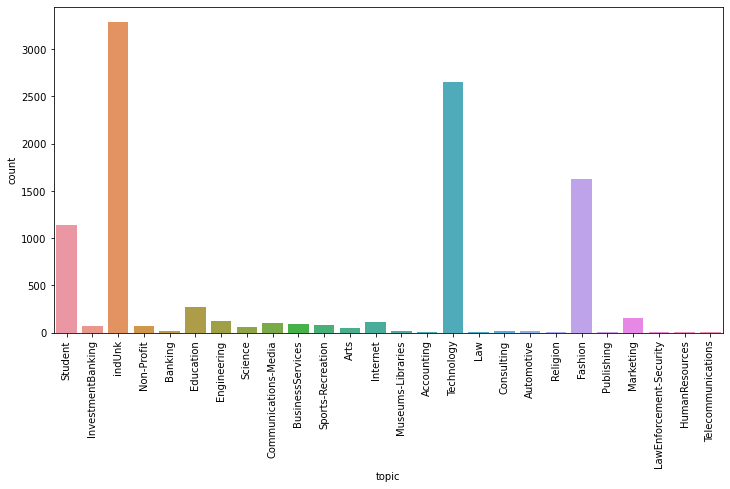

In [211]:
plt.figure(figsize=(12,6))
sns.countplot(Data['topic'])
plt.xticks(rotation=90)

#### More number in the topic of student IndUnk

<AxesSubplot:>

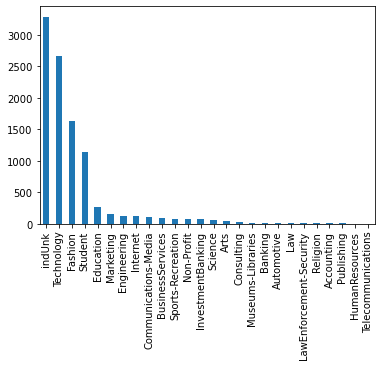

In [212]:
Data['topic'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='gender', ylabel='age'>

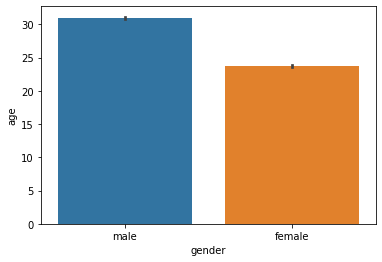

In [213]:
sns.barplot(x = 'gender',
            y = 'age',
            data = Data)

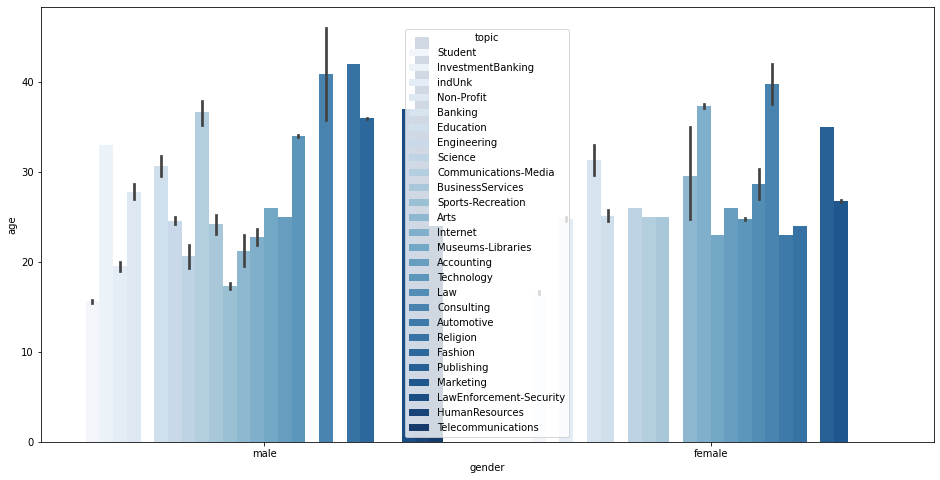

In [214]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'gender',
            y = 'age',
            hue = 'topic',
            data = Data,
            palette = "Blues")
plt.show()

###  Perform data pre-processing on the data:
    • Data cleansing by removing unwanted characters, spaces, stop words etc. 
    Convert text to lowercase.
    • Target/label merger and transformation
    • Train and test split
    • Vectorisation, etc.


In [215]:
Data.drop(labels=['id','date','sign'],axis=1,inplace=True)  #removing unwanted columns

In [216]:
#chosen few samples to speed up processing
Data = Data.sample(1500)

In [217]:
Data.shape

(1500, 4)

In [218]:
labels = Data.copy()
labels['age'] = labels['age'].astype(str)
labels['labels'] = labels[['gender','age','topic']].apply(lambda x:','.join(x), axis = 1) 


In [219]:
labels.drop(labels=['gender','text','age','topic'],axis=1,inplace=True)

In [220]:

labels.head()

,labels
7768,"male,36,Fashion"
5650,"female,27,indUnk"
4145,"female,34,indUnk"
2853,"male,35,Technology"
1860,"male,35,Technology"


In [221]:
labels.reset_index()

,index,labels
0,7768,"male,36,Fashion"
1,5650,"female,27,indUnk"
2,4145,"female,34,indUnk"
3,2853,"male,35,Technology"
4,1860,"male,35,Technology"
...,...,...
1495,246,"male,15,Student"
1496,5286,"female,17,indUnk"
1497,9268,"female,17,Student"
1498,9260,"female,17,Student"


In [222]:
new_data = Data.copy()
del Data
new_data = new_data['text']
new_data.head()
new_data.reset_index()

,index,text
0,7768,Like a Good Neighbor I'd like to...
1,5650,Today's new blog (to me) is that of...
2,4145,Universal Wonders How is it that every...
3,2853,"oh come on baby, you know you're my..."
4,1860,what the heck is that allen? did y...
...,...,...
1495,246,Standing by the window Watching the b...
1496,5286,arg
1497,9268,I saw Dorene today at Papa Murphy's. V...
1498,9260,I have joined the Blogger community...I...


In [223]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(new_data)):
    review = re.sub('[^a-zA-Z]', ' ',new_data.iloc[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [224]:
len(corpus)

1500

In [225]:
del new_data

In [226]:
X = corpus
joiny= lambda x: [["".join(re.findall("\w",f)) for f in lst] for lst in [str(s).split(",") for s in x]]
print(labels['labels'].apply(joiny))
y = labels['labels']

7768    [[m], [a], [l], [e], [, ], [3], [6], [, ], [F]...
5650    [[f], [e], [m], [a], [l], [e], [, ], [2], [7],...
4145    [[f], [e], [m], [a], [l], [e], [, ], [3], [4],...
2853    [[m], [a], [l], [e], [, ], [3], [5], [, ], [T]...
1860    [[m], [a], [l], [e], [, ], [3], [5], [, ], [T]...
                              ...                        
246     [[m], [a], [l], [e], [, ], [1], [5], [, ], [S]...
5286    [[f], [e], [m], [a], [l], [e], [, ], [1], [7],...
9268    [[f], [e], [m], [a], [l], [e], [, ], [1], [7],...
9260    [[f], [e], [m], [a], [l], [e], [, ], [1], [7],...
7285    [[m], [a], [l], [e], [, ], [3], [6], [, ], [F]...
Name: labels, Length: 1500, dtype: object


In [227]:
print(y[:5])
print(labels['labels'].head())

7768       male,36,Fashion
5650      female,27,indUnk
4145      female,34,indUnk
2853    male,35,Technology
1860    male,35,Technology
Name: labels, dtype: object
7768       male,36,Fashion
5650      female,27,indUnk
4145      female,34,indUnk
2853    male,35,Technology
1860    male,35,Technology
Name: labels, dtype: object


In [228]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [229]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                      ngram_range=(1, 3), stop_words = 'english')


vectorizer.fit(corpus)

CountVectorizer(ngram_range=(1, 3), stop_words='english',
                token_pattern='\\w{1,}')

In [230]:
xtrain_ctv = vectorizer.fit_transform(X_train)

In [231]:
xtest_ctv = vectorizer.transform(X_test)

In [232]:
vectorizer.get_feature_names()[:10]

['aa',
 'aa compar',
 'aa compar tougher',
 'aa nice',
 'aa nice post',
 'aa say',
 'aa say law',
 'aaahhhh',
 'aaahhhh diva',
 'aaron']

In [233]:
#y = [["".join(re.findall("\w",f)) for f in lst] for lst in [str(s).split(",") for s in y]]

In [234]:
vectorizer_labels = CountVectorizer(min_df = 1,ngram_range = (1,1),stop_words = "english")
labels_vector = vectorizer_labels.fit_transform(y)

In [235]:
labels_vector

<1500x47 sparse matrix of type '<class 'numpy.int64'>'
	with 4532 stored elements in Compressed Sparse Row format>

In [236]:
from sklearn.preprocessing import MultiLabelBinarizer
label_classes=[]
for  key in vectorizer_labels.vocabulary_.keys():
    label_classes.append(key)
print(label_classes)
binarizer = MultiLabelBinarizer(classes = label_classes)


['male', '36', 'fashion', 'female', '27', 'indunk', '34', '35', 'technology', '17', '25', 'internet', 'education', '24', '16', 'marketing', '15', 'student', '26', '23', '39', 'communications', 'media', '14', 'engineering', 'museums', 'libraries', '38', '42', 'consulting', '13', 'science', 'businessservices', 'religion', 'sports', 'recreation', '45', 'humanresources', '33', 'non', 'profit', 'banking', 'investmentbanking', '46', 'law', 'arts', 'accounting']


In [237]:

#labels_trans = binarizer.fit(labels) 
Y_train = [["".join(re.findall("\w",f)) for f in lst] for lst in [str(s).split(",") for s in y_train]]

Y_test = [["".join(re.findall("\w",f)) for f in lst] for lst in [str(s).split(",") for s in y_test]]


In [238]:
Y_train_bin = binarizer.fit_transform(Y_train)

Y_test_bin = binarizer.transform(Y_test) 

In [239]:
Y_train_bin.shape

(1050, 47)

In [240]:
Y_train_bin[:5]

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

In [241]:
binarizer.inverse_transform(Y_train_bin)[:5]

[('male', '36'),
 ('male', '33'),
 ('male', '24'),
 ('male', '16'),
 ('female', '14')]

In [242]:
Y_test_bin.shape

(450, 47)

In [243]:
Y_train_bin.shape

(1050, 47)

In [244]:
print(xtest_ctv.shape[0])

450


In [245]:
print(xtrain_ctv.shape[0])

1050


In [246]:
Y_test_bin[:5]

array([[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

In [247]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,average_precision_score,recall_score


In [248]:
#!pip install scikit-multilearn

In [249]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(xtrain_ctv,Y_train_bin)

# predict
nb_predictions = classifier.predict(xtest_ctv)
print("Test Accuracy:" + str(accuracy_score(Y_test_bin,nb_predictions)))

Test Accuracy:0.07111111111111111


In [250]:
print("Training Accuracy:",classifier.score(xtrain_ctv,Y_train_bin))

Training Accuracy: 0.981904761904762


In [251]:
print(binarizer.inverse_transform(nb_predictions)[0:5])

[('female', '24'), ('male',), ('male',), ('male', '35'), ('male',)]


In [252]:
Y_test_bin[0:5]

array([[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

In [253]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
lnb_classifier = LabelPowerset(GaussianNB())

# train
lnb_classifier.fit(xtrain_ctv, Y_train_bin)

# predict
lnb_predictions = classifier.predict(xtest_ctv)

print("Guassian NB accuracy labelpowerset", accuracy_score(Y_test_bin,lnb_predictions))

Guassian NB accuracy labelpowerset 0.07111111111111111


In [254]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bin,lnb_predictions)))
print('F1 score: Micro', f1_score(Y_test_bin, lnb_predictions,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bin, lnb_predictions.toarray(), average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bin, lnb_predictions,average='micro'))

Test Accuracy:0.07111111111111111
F1 score: Micro 0.4195804195804196
Average precision score: Micro 0.20200250312891116
Average recall score: Micro 0.4


In [255]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
lr_classifier = ClassifierChain(GaussianNB())

# train
lr_classifier.fit(xtrain_ctv, Y_train_bin)

# predict
lrc_predictions = classifier.predict(xtest_ctv)

print(accuracy_score(Y_test_bin,lrc_predictions))

0.07111111111111111


In [256]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bin,lrc_predictions)))
print('F1 score: Micro', f1_score(Y_test_bin, lrc_predictions,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bin, lrc_predictions.toarray(), average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bin, lrc_predictions,average='micro'))

Test Accuracy:0.07111111111111111
F1 score: Micro 0.4195804195804196
Average precision score: Micro 0.20200250312891116
Average recall score: Micro 0.4


In [257]:
vectorizer_labels_tfd = TfidfVectorizer(min_df = 3,ngram_range = (1,1),stop_words = "english")
labels_vector_tfd = vectorizer_labels.fit_transform(y)

In [258]:
binarizer_tfd = MultiLabelBinarizer(classes = label_classes)


In [259]:
Y_train_bintfd = binarizer_tfd.fit_transform(Y_train)

Y_test_bintfd = binarizer_tfd.transform(Y_test) 

In [260]:
tfv = TfidfVectorizer(min_df=3,  max_features=None,strip_accents='unicode', \
                      analyzer='word',token_pattern=r'\w{1,}',\
                      ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,\
                      stop_words = 'english')


# # Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(X_train) + list(X_test))
xtrain_tfv =  tfv.transform(X_train) 
xtest_tfv = tfv.transform(X_test)
xtrain_tfv

<1050x5988 sparse matrix of type '<class 'numpy.float64'>'
	with 54347 stored elements in Compressed Sparse Row format>

In [261]:
from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf_tfv = PassiveAggressiveClassifier(max_iter=50)
linear_clf_tfv = OneVsRestClassifier(linear_clf_tfv)

In [262]:
print(xtrain_tfv.shape[0],Y_train_bintfd.shape[0])

1050 1050


In [263]:
linear_clf_tfv.fit(xtrain_tfv, Y_train_bintfd)
linear_clf_pred = linear_clf_tfv.predict(xtest_tfv)
score = metrics.accuracy_score(Y_test_bintfd, linear_clf_pred)
print("accuracy:   %0.3f" % score)


accuracy:   0.262


In [273]:
print("Train accuracy",linear_clf_tfv.score(xtrain_tfv,Y_train_bin))

Train accuracy 0.9809523809523809


In [264]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bintfd,linear_clf_pred)))
print('F1 score: Micro', f1_score(Y_test_bintfd, linear_clf_pred,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bintfd, linear_clf_pred, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bintfd, linear_clf_pred,average='micro'))

Test Accuracy:0.26222222222222225
F1 score: Micro 0.594488188976378
Average precision score: Micro 0.38653539279869065
Average recall score: Micro 0.5033333333333333


In [265]:
lr_clf_tfv = LogisticRegression(solver = 'sag',max_iter = 1000,multi_class='auto') 
lr_clf_tfv = OneVsRestClassifier(lr_clf_tfv)
lr_clf_tfv.fit(xtrain_tfv,Y_train_bin)
lr_clf_tfv_pred=lr_clf_tfv.predict(xtest_tfv)

In [266]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bintfd,lr_clf_tfv_pred)))
print('F1 score: Micro', f1_score(Y_test_bintfd, lr_clf_tfv_pred,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bintfd, lr_clf_tfv_pred, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bintfd, lr_clf_tfv_pred,average='micro'))

Test Accuracy:0.022222222222222223
F1 score: Micro 0.525
Average precision score: Micro 0.33352158495220474
Average recall score: Micro 0.39666666666666667


In [267]:
print(binarizer.inverse_transform(lr_clf_tfv_pred)[0:5])

[('male',), ('male',), ('male',), ('male',), ('female',)]


In [268]:
print(binarizer.inverse_transform(Y_test_bintfd)[:5])

[('male', '35'), ('male', '36'), ('male', '35'), ('male', '36'), ('male', '36')]


In [269]:
from sklearn.naive_bayes import MultinomialNB

mnb_clf = MultinomialNB()
mnb_clf = OneVsRestClassifier(mnb_clf)
mnb_clf.fit(xtrain_tfv, Y_train_bin)
mnb_ypred = mnb_clf.predict(xtest_tfv)


In [270]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bin,mnb_ypred)))
print('F1 score: Micro', f1_score(Y_test_bin, mnb_ypred,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bin, mnb_ypred, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bin, mnb_ypred,average='micro'))

Test Accuracy:0.0022222222222222222
F1 score: Micro 0.48704663212435234
Average precision score: Micro 0.2936667662614731
Average recall score: Micro 0.3655555555555556


In [271]:
from sklearn.svm import LinearSVC
svc_clf = LinearSVC()
svc_clf = OneVsRestClassifier(svc_clf)
svc_clf.fit(xtrain_tfv, Y_train_bin)
svc_pred = svc_clf.predict(xtest_tfv)

In [272]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bintfd,svc_pred)))
print('F1 score: Micro', f1_score(Y_test_bintfd, svc_pred,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bin, svc_pred, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bin, svc_pred,average='micro'))

Test Accuracy:0.18222222222222223
F1 score: Micro 0.5844245348035838
Average precision score: Micro 0.38503061272648487
Average recall score: Micro 0.4711111111111111


Implemented different multilabel classifiers: 
    
    1. GaussianNB with Binaryrelevance,Classifierchain and  GaussianNB with Labelpowerset along with features transformed using countvectorizer.
    2. And PassiveAggressiveClassifier and Logiscticregression are implemented with tfid vectorizer.
    3. Also SVC,PassiveAggressiveClassifier and logistic regression are implemented using tfidvectorizer.
    With smaller dataset we get somewhat lower test accuracy. But if we increase the train size we get better accuracy. But the notebook slows down.
    PassiveAggressiveClassifier and SVC gives better accuracy compared to others on data size of 1500 for both train and test.
    